# Cenário: Loja Virtual de Produtos Eletrônicos

### Carregamento de dados

In [13]:
import pandas as pd
import matplotlib as mp

In [14]:
df = pd.read_csv('../data_raw/vendas2024.csv')
df.isnull()

,order_id,product_name,category,price,quantity,order_date,customer_region,payment_method
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False


In [15]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["month"] = df["order_date"].dt.month
df["revenue"] = df["price"] * df["quantity"]
df.head()

,order_id,product_name,category,price,quantity,order_date,customer_region,payment_method,month,revenue
0,1001,Teclado Gamer RGB,Periféricos,202.79,4,2024-10-01,Sudeste,Boleto,10,811.16
1,1002,Teclado Gamer RGB,Periféricos,2117.41,2,2024-03-12,Centro-Oeste,Boleto,3,4234.82
2,1003,Monitor UltraWide,Monitores,4496.22,3,2024-06-06,Nordeste,Boleto,6,13488.66
3,1004,Mouse Ergonômico,Periféricos,209.22,3,2024-10-11,Norte,Paypal,10,627.66
4,1005,Mouse Ergonômico,Periféricos,3312.43,5,2024-12-01,Centro-Oeste,Paypal,12,16562.15


### Categorias mais vendidas

In [16]:
categoriaQuantidade = df.groupby("category")["quantity"].sum().sort_values(ascending=False)

In [17]:
print("categorias de produtos mais vendidas:")
print(categoriaQuantidade)

categorias de produtos mais vendidas:
category
Armazenamento    6225
Periféricos      5942
Wearables        3096
Tablets          3024
Câmeras          3003
Monitores        2973
Acessórios       2929
Computadores     2897
Name: quantity, dtype: int64


### Ticket médio

In [18]:
ticketMedio = df["revenue"].sum() / df["order_id"].nunique()

In [19]:
print('Calcular o ticket médio das vendas:')
print(f'Ticket médio R$ {ticketMedio:.2f}')

Calcular o ticket médio das vendas:
Ticket médio R$ 7825.93


### Vendas o longo dos meses

<Axes: xlabel='month'>

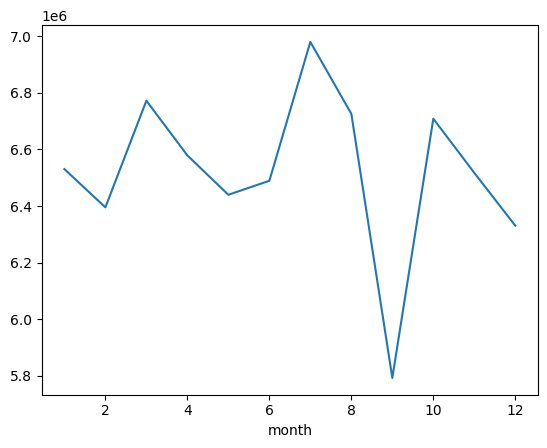

In [20]:
fig = df.groupby('month')['revenue'].sum().plot(kind='line')
fig

### Regiões que mais compraram

In [21]:
# Quantidade de compras por região
qtdReg = df.groupby("customer_region")["quantity"].sum().sort_values(ascending=False)
qtdReg

customer_region
Sudeste         6230
Nordeste        6086
Sul             5971
Norte           5914
Centro-Oeste    5888
Name: quantity, dtype: int64

In [22]:
# Montante comprado por região
valReg = df.groupby("customer_region")["revenue"].sum().sort_values(ascending=False)
valReg

customer_region
Nordeste        15974460.54
Sudeste         15936650.09
Sul             15740252.60
Norte           15304449.93
Centro-Oeste    15303513.67
Name: revenue, dtype: float64

### Metódo de pagamento mais usado

In [23]:
pagUsado = df["payment_method"].value_counts()
pagUsado

payment_method
Boleto    2556
Cartão    2494
Paypal    2475
Pix       2475
Name: count, dtype: int64

### Porduto campeão de vendas

In [24]:
campVendas = df.groupby("product_name")["quantity"].sum().sort_values(ascending=False).head(1)
campVendas

product_name
HD Externo 2TB    3200
Name: quantity, dtype: int64